In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

In [31]:
d=pd.read_csv('advertising.csv')
d

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [33]:
df=pd.DataFrame(d)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [35]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [36]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

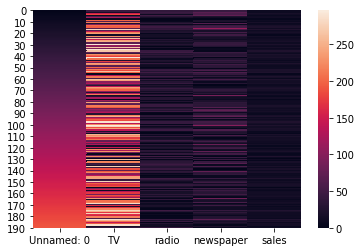

In [37]:
sns.heatmap(df)

In [38]:
dfcor=df.corr()
dfcor


,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [40]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


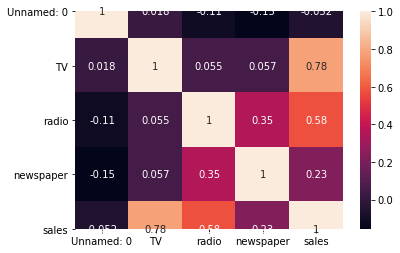

In [42]:
sns.heatmap(dfcor,annot=True)

In [43]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [44]:
df['newspaper']=np.log(df['newspaper'])

In [45]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -1.181239
sales         0.407571
dtype: float64

Unnamed: 0       AxesSubplot(0.125,0.125;0.133621x0.755)
TV            AxesSubplot(0.285345,0.125;0.133621x0.755)
radio          AxesSubplot(0.44569,0.125;0.133621x0.755)
newspaper     AxesSubplot(0.606034,0.125;0.133621x0.755)
sales         AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

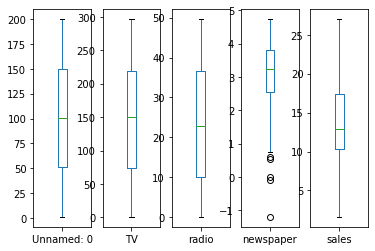

In [48]:
df.plot(kind='box',subplots=True,layout=(1,5))

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,4.237001,22.1
1,2,44.5,39.3,3.808882,10.4
2,3,17.2,45.9,4.238445,9.3
3,4,151.5,41.3,4.069027,18.5
4,5,180.8,10.8,4.067316,12.9
...,...,...,...,...,...
195,196,38.2,3.7,2.624669,7.6
196,197,94.2,4.9,2.091864,9.7
197,198,177.0,9.3,1.856298,12.8
198,199,283.6,42.0,4.192680,25.5


In [51]:
x=df_new.iloc[:,:-1]
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,4.237001
1,2,44.5,39.3,3.808882
2,3,17.2,45.9,4.238445
3,4,151.5,41.3,4.069027
4,5,180.8,10.8,4.067316
...,...,...,...,...
195,196,38.2,3.7,2.624669
196,197,94.2,4.9,2.091864
197,198,177.0,9.3,1.856298
198,199,283.6,42.0,4.192680


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.74589371e+00,  9.69891914e-01,  9.68397632e-01,
         1.26998788e+00],
       [-1.72851768e+00, -1.21047453e+00,  1.06968657e+00,
         7.79118887e-01],
       [-1.71114166e+00, -1.53118576e+00,  1.51535788e+00,
         1.27164358e+00],
       [-1.69376563e+00,  4.65255202e-02,  1.20473848e+00,
         1.07739340e+00],
       [-1.67638961e+00,  3.90732077e-01, -8.54803205e-01,
         1.07543177e+00],
       [-1.65901358e+00, -1.63104090e+00,  1.71793575e+00,
         1.36227234e+00],
       [-1.64163755e+00, -1.05775490e+00,  6.30767848e-01,
         3.16891701e-02],
       [-1.62426153e+00, -3.21176364e-01, -2.60574784e-01,
        -7.77785590e-01],
       [-1.58950947e+00,  6.13937693e-01, -1.40851605e+00,
        -8.64069163e-02],
       [-1.57213345e+00, -9.56724989e-01, -1.19243299e+00,
         6.53436066e-02],
       [-1.55475742e+00,  7.88977887e-01,  3.65394265e-02,
        -1.99855355e+00],
       [-1.53738140e+00, -1.45365118e+00,  7.86077549e-01,
      

In [54]:
y=df_new.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 197, dtype: float64

In [55]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print('max r2_score corresponding to',final_r_state,'is',max_r_score)
    return final_r_state

In [56]:
lreg=LinearRegression()
maxr2_score(lreg,x,y)

r2 score corresponding to  42 is 0.8714887801712956
r2 score corresponding to  43 is 0.9112219409606133
r2 score corresponding to  44 is 0.8850215033478721
r2 score corresponding to  45 is 0.8719154911542095
r2 score corresponding to  46 is 0.8593022875520316
r2 score corresponding to  47 is 0.8952867438841295
r2 score corresponding to  48 is 0.918440194302274
r2 score corresponding to  49 is 0.8121627525785678
r2 score corresponding to  50 is 0.8805170726658346
r2 score corresponding to  51 is 0.8456033485523122
r2 score corresponding to  52 is 0.9017264826886613
r2 score corresponding to  53 is 0.915959185964543
r2 score corresponding to  54 is 0.8531196523751325
r2 score corresponding to  55 is 0.8950843445740764
r2 score corresponding to  56 is 0.9142114376332318
r2 score corresponding to  57 is 0.9008923037793738
r2 score corresponding to  58 is 0.9106069223660846
r2 score corresponding to  59 is 0.92549739477168
r2 score corresponding to  60 is 0.8990521252258661
r2 score corresp

68

In [57]:
from sklearn.model_selection import cross_val_score
print('Mean r2 score of Linear Regression',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('STD of Linear regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

Mean r2 score of Linear Regression 0.883707634805164
STD of Linear regression: 0.04343764665424625


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x,y)
y_pred=lreg.predict(x_test)

In [60]:
lreg.score(x_train,y_train)

0.8805626855066866

In [62]:
print(lreg.intercept_)
print(lreg.coef_)

14.076142131979696
[-0.01678753  3.92025718  2.78370152  0.04828958]


In [63]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4135486067012355

In [64]:
r2_score(y_test,y_pred)

0.9402018392218024

In [65]:
from sklearn.externals import joblib

In [66]:
joblib.dump(lreg,'project_6.pkl')

['project_6.pkl']